In [73]:
#http://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
# csvデータセットを読み込み
cust_df = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")

In [4]:
# 不要なカラムを削除
del(cust_df['Channel'])
del(cust_df['Region'])
cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [5]:
#tolist」を用いると既存のndarrayをリストへ変換することができます。
#「tolist」は多次元配列でもすべてリストへ変換されます。それに対し「list」関数は内包する
#配列はリストへ変換されず、ndarrayのままです。

cust_array = np.array([cust_df['Fresh'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Grocery'].tolist(),
                       cust_df['Frozen'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Detergents_Paper'].tolist(),
                       cust_df['Delicassen'].tolist()
                       ], np.int32)

In [6]:
cust_array

array([[12669,  7057,  6353, ..., 14531, 10290,  2787],
       [ 9656,  9810,  8808, ..., 15488,  1981,  1698],
       [ 7561,  9568,  7684, ..., 30243,  2232,  2510],
       ..., 
       [ 9656,  9810,  8808, ..., 15488,  1981,  1698],
       [ 2674,  3293,  3516, ..., 14841,   168,   477],
       [ 1338,  1776,  7844, ...,  1867,  2125,    52]], dtype=int32)

In [7]:
# 行列を転置（行列を入れ替える）
#T というメソッドはNumPyのndarrayだけでなく、pandasのDataFrameでもそのまま使える。
cust_array = cust_array.T

In [8]:
cust_array

array([[12669,  9656,  7561, ...,  9656,  2674,  1338],
       [ 7057,  9810,  9568, ...,  9810,  3293,  1776],
       [ 6353,  8808,  7684, ...,  8808,  3516,  7844],
       ..., 
       [14531, 15488, 30243, ..., 15488, 14841,  1867],
       [10290,  1981,  2232, ...,  1981,   168,  2125],
       [ 2787,  1698,  2510, ...,  1698,   477,    52]], dtype=int32)

In [9]:
# クラスタ分析を実行 (クラスタ数=4)
pred = KMeans(n_clusters=4).fit_predict(cust_array)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0,
       3, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2,
       2, 3, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 3, 0, 1, 0, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 3, 2, 3,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1,

In [10]:
# Pandas のデータフレームにクラスタ番号を追加
cust_df['cluster_id']=pred
cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,1
7,7579,4956,9426,1669,3321,2566,1
8,5963,3648,6192,425,1716,750,1
9,6006,11093,18881,1159,7425,2098,2


In [11]:
# 各クラスタに属するサンプル数の分布
cust_df['cluster_id'].value_counts()

1    293
2     77
0     63
3      7
Name: cluster_id, dtype: int64

In [12]:
#クラスタ番号 = 0 に分類された顧客 (79 人) は、Grocery (食料雑貨品) と Detergents_Paper (衛生用品と紙類) の購買額が比較的高いことがわかります。
#クラスタ番号 = 1 に分類された顧客 (291 人) は、全体的に購買額が低い傾向にあります。
#クラスタ番号 = 2 に分類された顧客 (7 人) は、全てのジャンルで購買額が高いと言えます。
#クラスタ番号 = 3 に分類された顧客 (63 人) は、Fresh (生鮮食品) やFrozen (冷凍食品) の購買額が比較的高いことがわかります。

In [13]:
# 各クラスタの各部門商品の購買額の平均値
cust_df[cust_df['cluster_id']==0].mean() # クラスタ番号 = 0

Fresh               33611.269841
Milk                 4874.396825
Grocery              5852.968254
Frozen               5729.285714
Detergents_Paper     1056.730159
Delicassen           2119.587302
cluster_id              0.000000
dtype: float64

In [14]:
#各クラスタの各部門商品の購買額の平均値
cust_df[cust_df['cluster_id']==1].mean() # クラスタ番号 = 1

Fresh               8515.098976
Milk                3173.986348
Grocery             4422.122867
Frozen              2704.238908
Detergents_Paper    1335.354949
Delicassen          1090.204778
cluster_id             1.000000
dtype: float64

In [15]:
#各クラスタの各部門商品の購買額の平均値
cust_df[cust_df['cluster_id']==2].mean() # クラスタ番号 = 2

Fresh                4842.545455
Milk                12869.727273
Grocery             19918.740260
Frozen               1647.805195
Detergents_Paper     8944.558442
Delicassen           1722.519481
cluster_id              2.000000
dtype: float64

In [16]:
#各クラスタの各部門商品の購買額の平均値
cust_df[cust_df['cluster_id']==3].mean() # クラスタ番号 = 3

Fresh               42117.285714
Milk                46046.142857
Grocery             42914.285714
Frozen              10211.714286
Detergents_Paper    17327.571429
Delicassen          12192.142857
cluster_id              3.000000
dtype: float64

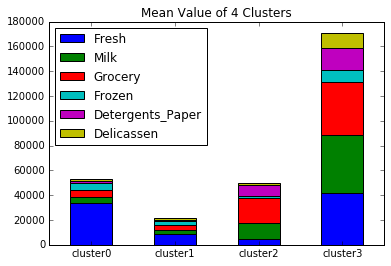

In [18]:
# 可視化（積み上げ棒グラフ）
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(4):
#クラスタの数0~3を繰り返す=iに代入
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
#データフレーム名をclusterinfoに指定
#'cluster' + str(i)でstrは、文字列を返すので、cluster０など表の下のクラスタ名を作成している
#cust_df[cust_df['cluster_id'] == i].mean()は、元データ「cust_df」から、['cluster_id'] == iで
#iの数値が入ったデータを取り出して、そのデータの平均を計算して['cluster' + str(i)] にデータを入れている。
clusterinfo = clusterinfo.drop('cluster_id')
#.drop(削除対象カラム名) カラムの削除
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")

my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

In [22]:
#0のクラスタのデータを表示。それぞれのクラスタデータを抽出できる。
cust_df[cust_df['cluster_id']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
4,22615,5410,7198,3915,1777,5185,0
12,31714,12319,11757,287,3881,2931,0
13,21217,6208,14982,3095,6707,602,0
14,24653,9465,12091,294,5058,2168,0
22,31276,1917,4469,9408,2381,4334,0
24,22647,9776,13792,2915,4482,5778,0
29,43088,2100,2609,1200,1107,823,0
33,29729,4786,7326,6130,361,1083,0
36,29955,4362,5428,1729,862,4626,0
39,56159,555,902,10002,212,2916,0


In [24]:
#1のクラスタのデータを表示。それぞれのクラスタデータを抽出できる。
cust_df[cust_df['cluster_id']==1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,1
7,7579,4956,9426,1669,3321,2566,1
8,5963,3648,6192,425,1716,750,1
10,3366,5403,12974,4400,5977,1744,1
11,13146,1124,4523,1420,549,497,1


In [26]:
#cluster1をcsvにエクスポートする。
#clust_df[cust_df['cluster_id']==1]をkkkと名前をつける
#kkk.to_csv("kkk.csv", sep=",")でエクスポート。pyworksフォルダに作成される
kkk=cust_df[cust_df['cluster_id']==1]
kkk.to_csv("kkk.csv", sep=",")